# Cat and Dog Image Data Exploration
We're going to look at some data for a classifier to differentiate between cats and dogs. The data is from a [2013 Kaggle competition](https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification), and I got help for this notebook using this [website](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/).

## Loading the Data
The first step is to obviously load the data. Let's start by looking at the dogs.

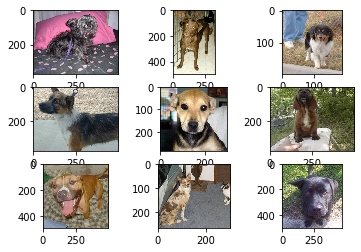

In [5]:
from matplotlib import pyplot
from matplotlib.image import imread

# define location of dataset
folder = './train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

Look at these cuties. We do have an issue with them, however: the pictures are all of various shapes and sizes. Some are portrait, some are square, and some are landscape. With all these different aspect ratios and pixel sizes, it can be difficult for the model to do well unless we make them uniform somehow. Let's check on the cats as well.

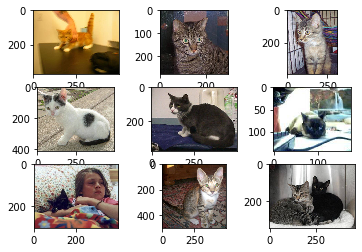

In [6]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

These cute critters have a similar issue to the dogs: they also have various shapes and sizes for the images. This will not do. We will have to do some processing before we can use our model.

## Image Sizing
We want all of our images to have a uniform size. Smaller images are faster to process, but we don't want them too small so that we lose too much detail. 128x128 would be a good compromise. The images will be small, but you (and the network) will be able to make out the details of the images still.

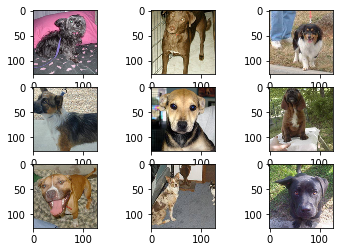

In [17]:
from PIL import Image, ImageOps
from resizeimage import resizeimage

size = (128, 128)

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # resize image
    resized_image = ImageOps.fit(image, size, Image.ANTIALIAS)
    # plot raw pixel data
    pyplot.imshow(resized_image)
# show the figure
pyplot.show()

This is fine. The images are small and keep much of the detail. Let's see how 128x128 cats look.

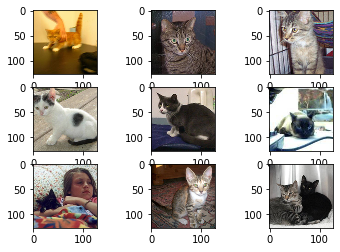

In [18]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # resize image
    resized_image = ImageOps.fit(image, size, Image.ANTIALIAS)
    # plot raw pixel data
    pyplot.imshow(resized_image)
# show the figure
pyplot.show()

Still looks pretty good. Judging from that some of the dog images, though, 128x128 might result in loss of details due to the cropping. Let's try 200x200 and see if that works.

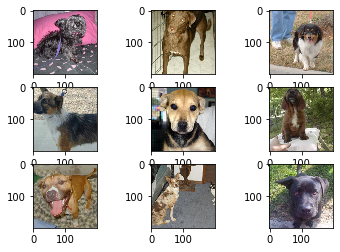

In [19]:
size = (200, 200)

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # resize image
    resized_image = ImageOps.fit(image, size, Image.ANTIALIAS)
    # plot raw pixel data
    pyplot.imshow(resized_image)
# show the figure
pyplot.show()

It's better. Let's check on the cats just in case.

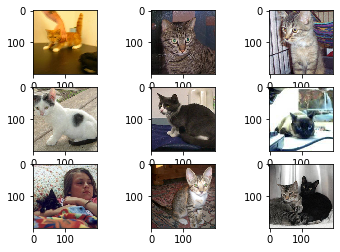

In [20]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # resize image
    resized_image = ImageOps.fit(image, size, Image.ANTIALIAS)
    # plot raw pixel data
    pyplot.imshow(resized_image)
# show the figure
pyplot.show()

Still good. 128x128 is a fine size, but 200x200 might be better to avoid losing too much detail. Going too much larger might slow down the model, but we can try 256x256 just in case.

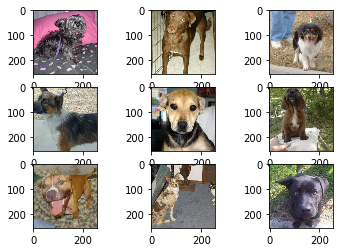

In [21]:
size = (256, 256)

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # resize image
    resized_image = ImageOps.fit(image, size, Image.ANTIALIAS)
    # plot raw pixel data
    pyplot.imshow(resized_image)
# show the figure
pyplot.show()

This is not too different than from 200x200. Again, let's check on the cats.

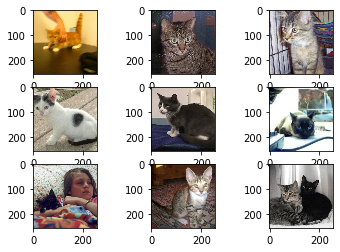

In [22]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # resize image
    resized_image = ImageOps.fit(image, size, Image.ANTIALIAS)
    # plot raw pixel data
    pyplot.imshow(resized_image)
# show the figure
pyplot.show()

It's really hard to tell the difference between 256x256 and 200x200. I think 200x200 is a good size.

## Color
Another important aspect to consider is whether we should keep the images in color or have them be grayscale. The latter would run much faster, but the former has more detail. We have obviously seen the images in color, so let's skip that step and see how they look in black and white, starting with the dogs.

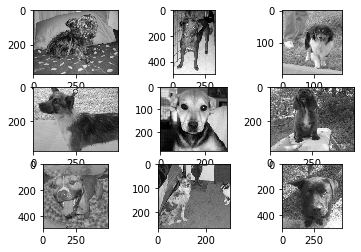

In [25]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # remove color
    grayscale_image = image.convert('LA')
    # plot raw pixel data
    pyplot.imshow(grayscale_image)
# show the figure
pyplot.show()

For some of these original images, the grayscale makes it hard to tell the dog from the background. Let's check on how they look when they're resized to 200x200.

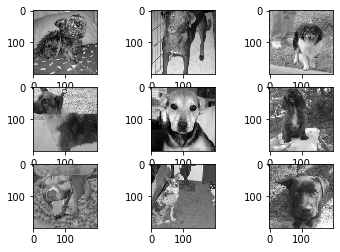

In [29]:
size = (200, 200)

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # resize image
    resized_image = ImageOps.fit(image, size, Image.ANTIALIAS)
    # remove color
    resized_grayscale_image = resized_image.convert('LA')
    # plot raw pixel data
    pyplot.imshow(resized_grayscale_image)
# show the figure
pyplot.show()

Between the size and the lack of color, too much detail might be lost. It's especially hard to tell where the background ends and the dog begins with the bottom-left and top-left images.

Let's check on the cats as well.

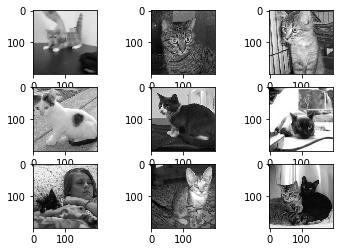

In [30]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = Image.open(filename)
    # resize image
    resized_image = ImageOps.fit(image, size, Image.ANTIALIAS)
    # remove color
    resized_grayscale_image = resized_image.convert('LA')
    # plot raw pixel data
    pyplot.imshow(resized_grayscale_image)
# show the figure
pyplot.show()

Again, too much detail might be lost here. While running in grayscale would have the training go faster, we would most likely get more accurate results if we keep our images in color.

## Conclusion
I have come to the conclusion that 200x200 color images would make for the best results. 200x200 is a nice and small uniform size that is a good compromise between training speed and image detail. G